In [15]:
import os
os.chdir(r"C:\Users\pc\Desktop\har-ml")  # Raw string
print(os.getcwd())  # Confirm the path change

C:\Users\pc\Desktop\har-ml


In [16]:
import pandas as pd

# Load the processed dataset
file_path = "data/UCI_preprocessed.csv"  # Ensure this is the correct path
uci_df = pd.read_csv(file_path)

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
label_encoder = LabelEncoder()
uci_df['Activity'] = label_encoder.fit_transform(uci_df['Activity'])

# Prepare data
X = uci_df.iloc[:, :-1]  # Features
y = uci_df['Activity']   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.983495145631068
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.98      0.94      0.96       377
           2       0.94      0.97      0.96       354
           3       1.00      0.99      1.00       369
           4       1.00      1.00      1.00       284
           5       0.99      1.00      0.99       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9786407766990292
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.97      0.95      0.96       377
           2       0.95      0.96      0.96       354
           3       0.99      0.99      0.99       369
           4       0.99      0.96      0.98       284
           5       0.97      0.99      0.98       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid with fewer values
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use Randomized Search instead of Grid Search
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_
best_accuracy = random_search.best_score_

print("Best Model Accuracy:", best_accuracy)


Best Model Accuracy: 0.9717198386233082


Model Accuracy: 0.9766990291262136
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       0.96      0.96      0.96       377
           2       0.96      0.96      0.96       354
           3       0.98      0.99      0.99       369
           4       0.98      0.97      0.97       284
           5       0.98      0.97      0.98       270

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060

Diagram saved at: C:\Users\pc\Desktop\har-ml\results\confusion_matrix.png


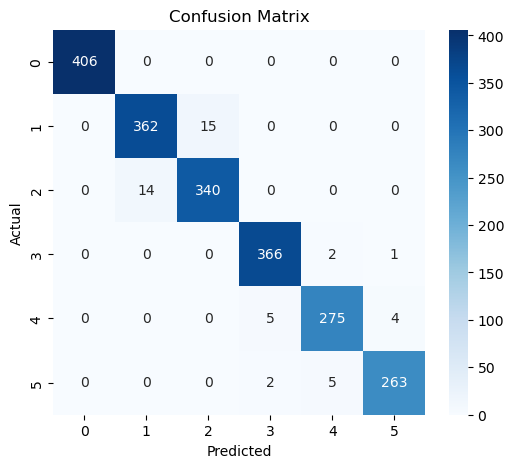

 Model evaluation completed and results saved.


In [26]:

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = r"C:\Users\pc\Desktop\har-ml\results"



# Load the saved label encoder and transform labels
label_encoder = joblib.load("../models/label_encoder.pkl")
uci_df['Activity'] = label_encoder.transform(uci_df['Activity'])

# Prepare data
X = uci_df.iloc[:, :-1]  # Features
y = uci_df['Activity']   # Target

# Load train-test split structure (same as training)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the saved scaler and standardize test data
scaler = joblib.load("../models/scaler.pkl")
X_test = scaler.transform(X_test)

# Load the trained best model
best_model = joblib.load("../models/best_model.pkl")

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate and save confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
save_path = os.path.join(results_dir, "confusion_matrix.png")
plt.savefig(save_path)
print(f"Diagram saved at: {save_path}")
plt.show()

print(" Model evaluation completed and results saved.")
